<a id="title_ID"></a>
# JWST Pipeline Validation Notebook: calwebb_coron3 with NIRCam

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam 

### Table of Contents

<div style="text-align: left"> 
    
<br> [Introduction\*](#intro)
<br> [JWST CalWG Algorithm\*](#algorithm)
<br> [Test Description\*](#description)
<br> [Data Description\*](#data_descr)
<br> [Imports\*](#imports)
<br> [Set up Temporary Directory\*](#temp)
<br> [Loading the Data\*](#data_load)
<br> [Run the Pipeline](#pipeline)
<br> [Perform Tests or Visualization](#testing) 
<br> [About This Notebook\*](#about)
<br>    

</div>

<a id="intro"></a>
# Introduction

This notebook validates the stage 3 coronagraphic pipeline (calwebb_coron3).

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_coron3.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/coron

[Top of Page](#title_ID)

<a id="algorithm"></a>
# JWST CalWG Algorithm

The coron3 pipeline consists of the following steps:

1) outlier_detection: identifies bad pixels/outliers in the input images

2) stack_refs: stacks the reference PSFs together into a 3D data cube

3) align_refs: aligns/shifts the stack of reference PSFs to the target PSFs

4) klip: uses the Karhunen-Loeve Image Plane (KLIP) algorithm to fit and subtract an optimal PSF from the target PSFs

5) resample: combines the PSF-subtracted target images into a single product

[Top of Page](#title_ID)

<a id="description"></a>
# Test Description

All steps of the calwebb_coron3 pipeline are run on the simulated input data.

The tests will ensure basic header/data info in the output images is as expected (e.g. image dimensions, number of outliers detected), as well as inspect the quality of the PSF alignments and the PSF-subtracted images.


[Top of Page](#title_ID)

<a id="data_descr"></a>
# Data Description

The NIRCam test data consists of 9 small-grid dithered reference PSFs (2 ints, 10 groups) as well as 1 target PSF (10 ints, 10 groups) with 2 companions. The instrument setup for these exposures is as follows:

DETECTOR = NRCA2

SUBARRAY = SUB640A210R

FILTER = F210M

PUPIL = MASKRND

CORONMSK = MASKA210R

READPATT = RAPID

[Top of Page](#title_ID)

<a id="imports"></a>
# Imports

* astropy.io for opening fits files
* ci_watson.artifactory_helpers to retrieve test data from artifactory
* glob for making file lists
* jwst.pipeline.calwebb_coron3 is the pipeline step being tested
* matplotlib.pyplot to generate plots
* os for file handling
* tempfile to create a temporary processing directory


In [1]:
from astropy.io import fits
from ci_watson.artifactory_helpers import get_bigdata
import glob
from jwst.pipeline.calwebb_coron3 import Coron3Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from tempfile import TemporaryDirectory

[Top of Page](#title_ID)

<a id="temp"></a>
# Set up Temporary Directory


In [2]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory

data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

In [3]:
import os
if 'CRDS_CACHE_TYPE' in os.environ:
    if os.environ['CRDS_CACHE_TYPE'] == 'local':
        os.environ['CRDS_PATH'] = os.path.join(os.environ['HOME'], 'crds', 'cache')
    elif os.path.isdir(os.environ['CRDS_CACHE_TYPE']):
        os.environ['CRDS_PATH'] = os.environ['CRDS_CACHE_TYPE']
print('CRDS cache location: {}'.format(os.environ['CRDS_PATH']))

CRDS cache location: /grp/crds/cache


[Top of Page](#title_ID)

<a id="data_load"></a>
# Loading the Data

In [4]:
# Copy the test files from Artifactory into the temporary directory

files = ['lib_ss20_sgd1_calints.fits', 'lib_ss20_sgd2_calints.fits', 'lib_ss20_sgd3_calints.fits',
         'lib_ss20_sgd4_calints.fits', 'lib_ss20_sgd5_calints.fits', 'lib_ss20_sgd6_calints.fits',
         'lib_ss20_sgd7_calints.fits', 'lib_ss20_sgd8_calints.fits', 'lib_ss20_sgd9_calints.fits',
         'lib_ss20_target_roll1_calints.fits', 'coro_test.asn']
for f in files:
    file = get_bigdata('jwst_validation_notebooks',
                       'validation_data',
                       'calwebb_coron3',
                       'coron3_nircam_test', f)

[Top of Page](#title_ID)

<a id="pipeline"></a>
# Run the Pipeline

In [5]:
# Initialize the coron3 pipeline
m = Coron3Pipeline()
m.save_results = True

# Run the pipeline
m.run('coro_test.asn')

2022-07-06 09:31:24,234 - stpipe.Coron3Pipeline - INFO - Coron3Pipeline instance created.


2022-07-06 09:31:24,238 - stpipe.Coron3Pipeline.stack_refs - INFO - StackRefsStep instance created.


2022-07-06 09:31:24,241 - stpipe.Coron3Pipeline.align_refs - INFO - AlignRefsStep instance created.


2022-07-06 09:31:24,244 - stpipe.Coron3Pipeline.klip - INFO - KlipStep instance created.


2022-07-06 09:31:24,248 - stpipe.Coron3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2022-07-06 09:31:24,251 - stpipe.Coron3Pipeline.resample - INFO - ResampleStep instance created.


2022-07-06 09:31:24,437 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline running with args ('coro_test.asn',).


2022-07-06 09:31:24,442 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'steps': {'stack_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'align_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}, 'klip': {'pre_hooks': [], 'post_hooks': [], 'output_file': No

2022-07-06 09:31:24,443 - stpipe.Coron3Pipeline - INFO - Starting calwebb_coron3 ...


2022-07-06 09:31:25,580 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd1_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:26,129 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:26,131 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:26,361 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd2_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:26,364 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:26,366 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:26,590 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd3_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:26,594 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:26,595 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:26,822 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd4_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:26,826 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:26,827 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:27,056 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd5_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:27,059 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:27,061 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:27,422 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd6_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:27,427 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:27,430 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:27,657 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd7_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:27,661 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:27,662 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:27,892 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd8_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:27,895 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:27,897 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:28,127 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd9_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:28,130 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:28,132 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:28,417 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_target_roll1_calints.fits' reftypes = ['drizpars', 'psfmask']


2022-07-06 09:31:28,420 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2022-07-06 09:31:28,422 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2022-07-06 09:31:30,767 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd1_calints.fits>,).


2022-07-06 09:31:30,769 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:30,780 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:30,826 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:30,930 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:30,988 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:31,007 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:31,024 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:31,172 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd1_c1001_crfints.fits


2022-07-06 09:31:31,173 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:31,304 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd2_calints.fits>,).


2022-07-06 09:31:31,306 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:31,316 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:31,345 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:31,443 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:31,496 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:31,514 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:31,531 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:31,673 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd2_c1001_crfints.fits


2022-07-06 09:31:31,674 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:31,806 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd3_calints.fits>,).


2022-07-06 09:31:31,809 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:31,818 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:31,847 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:31,945 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:31,998 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:32,017 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:32,033 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:32,184 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd3_c1001_crfints.fits


2022-07-06 09:31:32,185 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:32,318 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd4_calints.fits>,).


2022-07-06 09:31:32,320 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:32,331 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:32,359 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:32,458 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:32,512 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:32,530 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:32,546 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:32,688 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd4_c1001_crfints.fits


2022-07-06 09:31:32,689 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:32,821 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd5_calints.fits>,).


2022-07-06 09:31:32,823 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:32,833 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:32,863 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:32,968 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:33,020 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:33,041 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:33,059 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:33,201 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd5_c1001_crfints.fits


2022-07-06 09:31:33,202 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:33,349 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd6_calints.fits>,).


2022-07-06 09:31:33,351 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:33,361 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:33,389 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:33,486 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:33,538 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:33,555 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:33,571 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:33,709 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd6_c1001_crfints.fits


2022-07-06 09:31:33,710 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:33,840 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd7_calints.fits>,).


2022-07-06 09:31:33,843 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:33,852 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:33,881 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:33,976 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:34,029 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:34,046 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:34,061 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:34,199 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd7_c1001_crfints.fits


2022-07-06 09:31:34,200 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:34,329 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd8_calints.fits>,).


2022-07-06 09:31:34,332 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:34,341 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:34,370 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:34,464 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:34,518 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:34,537 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:34,552 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:34,691 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd8_c1001_crfints.fits


2022-07-06 09:31:34,692 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:34,828 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd9_calints.fits>,).


2022-07-06 09:31:34,830 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:34,841 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2022-07-06 09:31:34,868 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:34,963 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2022-07-06 09:31:35,015 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:35,032 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:35,048 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:35,187 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd9_c1001_crfints.fits


2022-07-06 09:31:35,188 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:35,325 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs running with args (<ModelContainer>,).


2022-07-06 09:31:35,327 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2022-07-06 09:31:35,367 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 1 to output stack


2022-07-06 09:31:35,373 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 2 to output stack


2022-07-06 09:31:35,377 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 3 to output stack


2022-07-06 09:31:35,381 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 4 to output stack


2022-07-06 09:31:35,386 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 5 to output stack


2022-07-06 09:31:35,390 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 6 to output stack


2022-07-06 09:31:35,395 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 7 to output stack


2022-07-06 09:31:35,399 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 8 to output stack


2022-07-06 09:31:35,403 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 9 to output stack


2022-07-06 09:31:35,455 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs done


2022-07-06 09:31:35,583 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_psfstack.fits


2022-07-06 09:31:35,975 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_calints.fits>,).


2022-07-06 09:31:35,978 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2022-07-06 09:31:35,988 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 10 inputs


2022-07-06 09:31:36,016 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/jwst/resample/resample_utils.py:181: RuntimeWarning: var_rnoise array not available. Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available. Setting drizzle weight map to 1",



2022-07-06 09:31:36,405 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 10 images


2022-07-06 09:31:36,582 - stpipe.Coron3Pipeline.outlier_detection - INFO - Flagging outliers


2022-07-06 09:31:36,599 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,614 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,629 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,645 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,662 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,679 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,695 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,712 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,729 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,746 - stpipe.Coron3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 0 (0.00%)


2022-07-06 09:31:36,945 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_target_roll1_c1001_crfints.fits


2022-07-06 09:31:36,947 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2022-07-06 09:31:37,097 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <CubeModel(18, 640, 640) from coro_test_psfstack.fits>).


2022-07-06 09:31:37,098 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}


2022-07-06 09:31:37,124 - stpipe.Coron3Pipeline.align_refs - INFO - Using PSFMASK reference file /grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits


2022-07-06 09:31:37,207 - stpipe.Coron3Pipeline.align_refs - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,



2022-07-06 09:31:37,209 - stpipe.Coron3Pipeline.align_refs - WARNING - /internal/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)



2022-07-06 09:35:32,525 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs done


2022-07-06 09:35:33,410 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfalign.fits


2022-07-06 09:35:33,584 - stpipe.Coron3Pipeline.klip - INFO - Step klip running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <QuadModel(10, 18, 640, 640) from lib_ss20_target_roll1_c1001_psfalign.fits>).


2022-07-06 09:35:33,586 - stpipe.Coron3Pipeline.klip - INFO - Step klip parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'truncate': 50}


2022-07-06 09:35:33,596 - stpipe.Coron3Pipeline.klip - INFO - KL transform truncation = 50


2022-07-06 09:35:37,329 - stpipe.Coron3Pipeline.klip - INFO - Step klip done


2022-07-06 09:35:37,523 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfsub.fits


2022-07-06 09:35:38,195 - stpipe.Coron3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2022-07-06 09:35:38,197 - stpipe.Coron3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}


2022-07-06 09:35:38,219 - stpipe.Coron3Pipeline.resample - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits


2022-07-06 09:35:38,400 - stpipe.Coron3Pipeline.resample - INFO - Resampling science data


2022-07-06 09:35:38,661 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:39,090 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:39,514 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:39,943 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:40,373 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:40,811 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:41,254 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:41,688 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:42,243 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:42,811 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:43,091 - stpipe.Coron3Pipeline.resample - INFO - Resampling var_rnoise


2022-07-06 09:35:43,488 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:44,033 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:44,628 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:45,145 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:45,693 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:46,291 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:46,755 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:47,205 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:47,705 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:48,271 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:48,528 - stpipe.Coron3Pipeline.resample - INFO - Resampling var_poisson


2022-07-06 09:35:48,812 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:49,279 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:49,753 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:50,241 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:50,737 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:51,302 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:51,799 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:52,296 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:52,817 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:53,260 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:53,466 - stpipe.Coron3Pipeline.resample - INFO - Resampling var_flat


2022-07-06 09:35:53,793 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:54,235 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:54,685 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:55,274 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:55,752 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:56,273 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:56,727 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:57,208 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:57,748 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:58,230 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (597, 594)


2022-07-06 09:35:58,473 - stpipe.Coron3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  346.825740511 21.254561619 346.825712687 21.260994739 346.818844431 21.260968800 346.818872554 21.254535681


2022-07-06 09:35:58,482 - stpipe.Coron3Pipeline.resample - INFO - Step resample done


2022-07-06 09:35:59,999 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_i2d.fits


2022-07-06 09:36:00,000 - stpipe.Coron3Pipeline - INFO - ...ending calwebb_coron3


2022-07-06 09:36:00,001 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline done


[Top of Page](#title_ID)

<a id="testing"></a>
# Perform Tests

In [6]:
# Make sure the PSF stack/alignment/subtraction images have the expected data dimensions.
# The expected dimensions for the psf stack images are:
# NX x NY x Number of Reference PSF INTS
# The expected dimensions for the psf alignment images are:
# NX x NY x Number of Reference PSF INTS x Number of Target INTS
# The expected dimensions for the psf subtraction images are:
# NX x NY x Number of Target INTS

f_stack = 'coro_test_psfstack.fits'
f_align = 'lib_ss20_target_roll1_c1001_psfalign.fits'
f_sub = 'lib_ss20_target_roll1_c1001_psfsub.fits'
files = [f_stack, f_align, f_sub]
expected_shapes = [(18, 640, 640), (10, 18, 640, 640), (10, 640, 640)]
for f,shape in zip(files, expected_shapes):
    for ext in ['SCI', 'ERR', 'DQ']:
        data = fits.getdata(f, ext)
        if data.shape != shape:
            print('WARNING: unexpected data shape in {} {}: {}'.format(f, ext, data.shape))

In [7]:
# Make sure a reasonable number of outlier pixels are flagged in each exposure (less than 1%)

files = sorted(glob.glob('*crfints.fits'))
for f in files:
    print(os.path.basename(f))
    dq = fits.getdata(f, 'DQ')
    nints, ny, nx = dq.shape
    for integration in range(nints):
        dq_int = dq[integration]
        n_outlier = len(dq_int[dq_int&16!=0])
        print('\tOutlier pixels in Int {}: {} ({:.5f}% of image)'.format(integration+1,
              n_outlier, n_outlier/(ny*nx)*100))

lib_ss20_sgd1_c1001_crfints.fits
	Outlier pixels in Int 1: 2 (0.00049% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd2_c1001_crfints.fits
	Outlier pixels in Int 1: 1 (0.00024% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd3_c1001_crfints.fits
	Outlier pixels in Int 1: 2 (0.00049% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd4_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd5_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd6_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd7_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd8_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels 

Text(0, 0.5, 'PSF - Mean PSF [MJy/sr]')

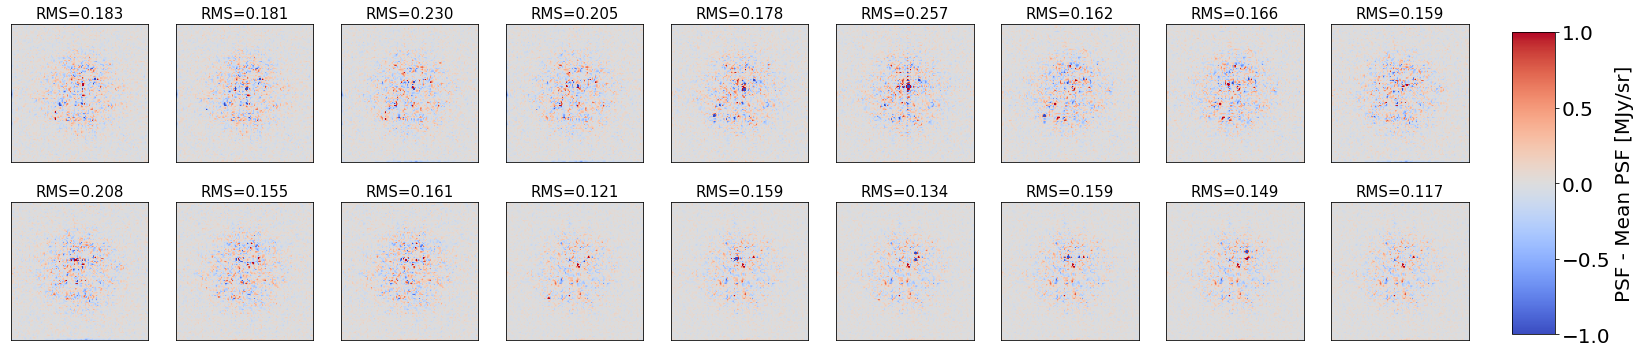

In [8]:
# Make sure the PSFs were aligned properly (i.e. residual alignment RMS should be <0.5 MJr/sr). 
# Each frame represents one PSF-aligned reference integration. There shouldn't be any severe "ringing" 
# effect from outlier pixels (i.e. cross pattern), as these should have been corrected in earlier steps.
# There also shouldn't be any PSF pattern offsets visible in the images, only salt/pepper noise.

fig, axes = plt.subplots(2, 9, figsize=(30,6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_align, 'SCI')
mean = np.mean(data[0], axis=0)
for i, ax in enumerate(axes.flatten()):
    diff = data[0, i] - mean
    diff = diff[y1:y2, x1:x2]
    r = np.sqrt(np.mean(diff**2))
    im = ax.imshow(diff, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title('RMS={:.3f}'.format(r),size=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('PSF - Mean PSF [MJy/sr]', size=20)

Text(0, 0.5, 'Residual PSF [MJy/sr]')

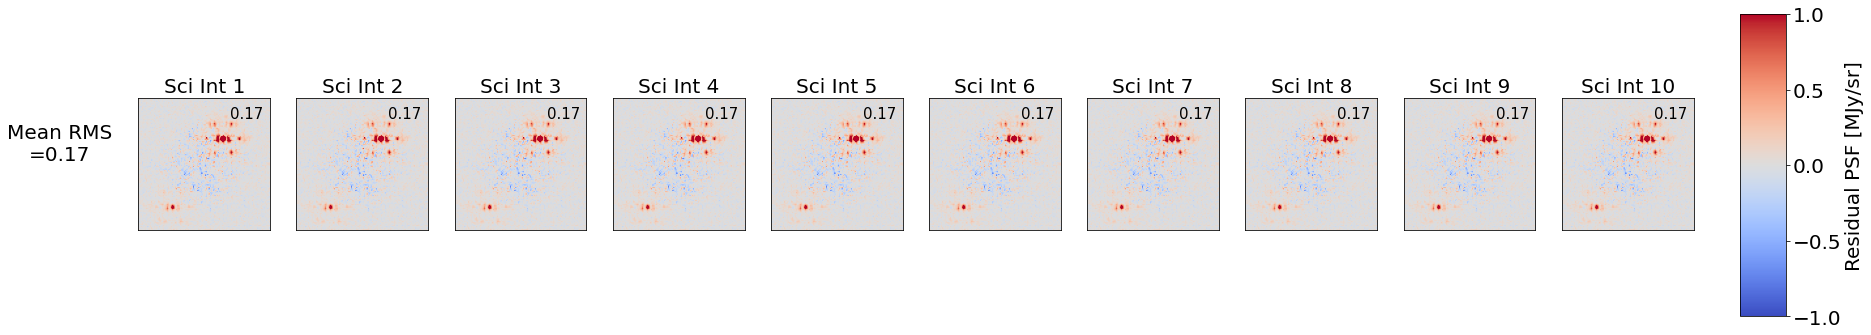

In [9]:
# Make sure the PSF fitting/subtraction worked properly. The 2 companions should be obviously visible
# in red in the top right/bottom left of the image, and the remainder of the image should be ~gray 
# (i.e. residual RMS should be <0.5 MJy/sr).

fig, axes = plt.subplots(1,10, figsize=(32, 6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_sub, 'SCI')
rms = []
for i, ax in enumerate(axes):
    d = data[i, y1:y2, x1:x2]
    r = np.sqrt(np.mean(d**2))
    im = ax.imshow(d, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_title('Sci Int {}'.format(i+1), size=20)
    ax.set_yticks([])
    ax.set_xticks([])
    rms.append(r)
    ax.text(70, 85, '{:.2f}'.format(r), size=15)
axes[0].set_ylabel('Mean RMS\n={:.2f}'.format(np.mean(rms)), size=20, rotation='horizontal', labelpad=75)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('Residual PSF [MJy/sr]', size=20)

Text(0.5, 1.0, 'Residual RMS=0.069')

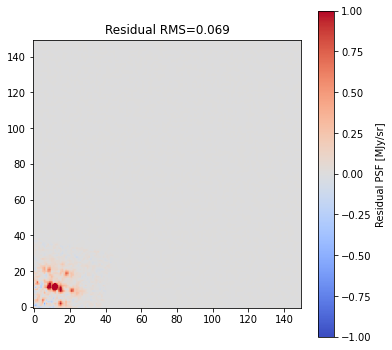

In [10]:
# Make sure the final, combined PSF-subtracted image looks good as well (should just look like 
# a cleaner combination of the above, with residual RMS <0.15)

plt.figure(figsize=(6, 6))
data = fits.getdata('coro_test_i2d.fits', 'SCI')
data = data[300:450, 300:450]
plt.imshow(data, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
plt.colorbar(label='Residual PSF [MJy/sr]')
rms = np.sqrt(np.mean(data**2))
plt.title('Residual RMS={:.3f}'.format(rms))

[Top of Page](#title_ID)

<a id="about"></a>
## About this Notebook
**Author:** Ben Sunnquist, Staff Scientist, NIRCam
<br>**Updated On:** 02/10/2021

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 